# Irish_classification using SVM

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
iris = sns.load_dataset("iris")
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


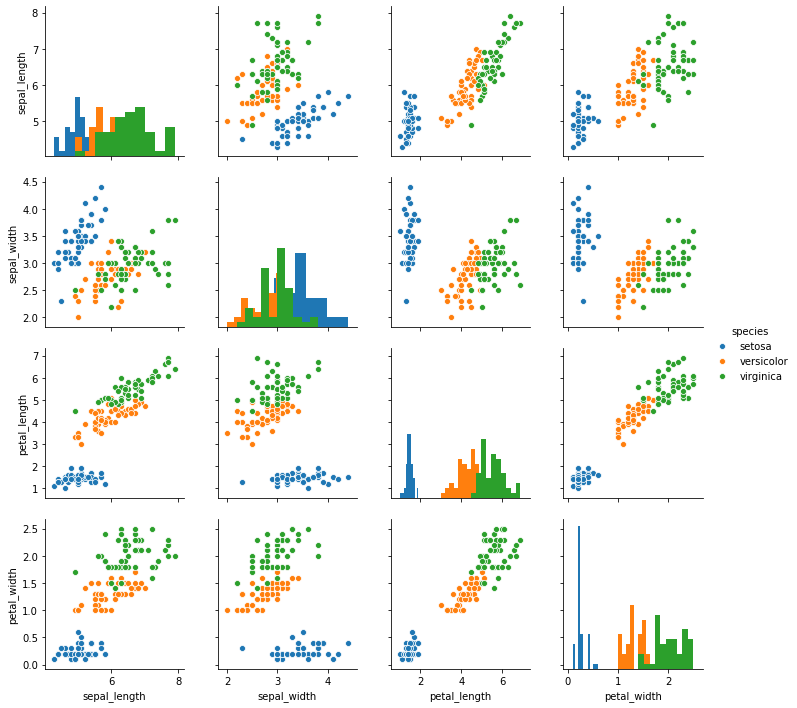

In [3]:
sns.pairplot(iris,hue="species",diag_kind="hist")

In [9]:
setosa=iris[iris["species"]=="setosa"]

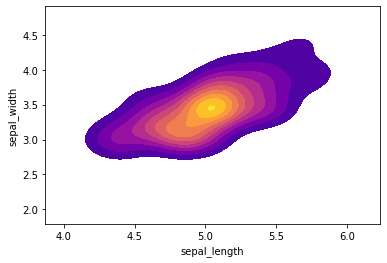

In [16]:
sns.kdeplot(setosa["sepal_length"],setosa["sepal_width"],cmap="plasma",shade=True,shade_lowest=False)

In [17]:
from sklearn.model_selection import train_test_split

In [20]:
X=iris.drop("species",axis=1)
y=iris["species"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

In [21]:
from sklearn.svm import SVC

In [23]:
model = SVC()

In [24]:
model.fit(X_train,y_train)

C:\Users\maury\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [25]:
pred=model.predict(X_test)

In [26]:
#evaluation

In [29]:
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,pred))

print("/n")

print(classification_report(y_test,pred))

[[13  0  0]
 [ 0 20  0]
 [ 0  0 12]]
/n
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        13
  versicolor       1.00      1.00      1.00        20
   virginica       1.00      1.00      1.00        12

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



as data set was less its a particulary pretty much perfect guess tho i m using Grid search 

In [31]:
from sklearn.model_selection import GridSearchCV

In [32]:
params_grid = {"C":[0.1,1,10,100,1000],"gamma":[1,0.1,0.01,0.001,0.0001]}

In [36]:
grid=GridSearchCV(SVC(),params_grid,verbose=3)

In [37]:
grid.fit(X_train,y_train)

C:\Users\maury\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


Fitting 3 folds for each of 25 candidates, totalling 75 fits
[CV] C=0.1, gamma=1 ..................................................
[CV] ...................... C=0.1, gamma=1, score=0.917, total=   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ...................... C=0.1, gamma=1, score=0.914, total=   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ...................... C=0.1, gamma=1, score=0.882, total=   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] .................... C=0.1, gamma=0.1, score=0.750, total=   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] .................... C=0.1, gamma=0.1, score=0.771, total=   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] .................... C=0.1, gamma=0.1, score=0.765, total=   0.0s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] ...........

[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:    0.3s finished


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [38]:
grid.best_estimator_

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [39]:
grid.best_params_

{'C': 1, 'gamma': 0.1}

In [40]:
print(confusion_matrix(y_test,grid.predict(X_test)))

print("/n")

print(classification_report(y_test,grid.predict(X_test)))

[[13  0  0]
 [ 0 19  1]
 [ 0  0 12]]
/n
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        13
  versicolor       1.00      0.95      0.97        20
   virginica       0.92      1.00      0.96        12

    accuracy                           0.98        45
   macro avg       0.97      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



 this makes sense, there is basically just one point that is too noisey to grab, which makes sense, we don't want to have an overfit model that would be able to grab that.